In [300]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from adjustText import adjust_text
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Pitch, add_image
plt.style.use('default')
import matplotlib.font_manager as fm
import numpy as np
font = fm.FontProperties(fname=r"C:\Users\YahyaRashwan\Desktop\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf")

In [301]:
df = pd.read_csv(r"C:\Users\YahyaRashwan\Downloads\Player Possession 2022-2023 Premier League (per 90) - Sheet1 (3).csv")
df = df.iloc[1: , :]

In [302]:
df.rename(columns =
 {     'Touc.1':"Touches in defensive penalty area",      'Touc.2':"Touches in defensive third",       'Touc.3':"Touches in middle third",    'Touc.4':"Touches in attacking third",       'Touc.5':"Touches in attacking penalty area",

       'Touc.6':"Live touches",   'Drib':"Successful dribbles",   'Drib.1':"Dribbles attempted",  'Drib.2':"Dribbles success %", 'Drib.3':"# of players dribbled",

       'Drib.4':"# of nutmegs", 'Carr.1':"Carries total distance", 'Carr.2':"Carries progressive distance", 'Carr.3':"Progressive carries",

       'Carr.4':"Carries sent into the closest third to goal", 'Carr.5':"Carries sent into penalty area", 'Carr.6':"Carries missed", 'Carr.7':"Carries lost", 'Rece':"Passes recieved",
       
       'Rece.1':"Passes recieved succcessfully", 'Rece.2':"Recieving success %", 'Rece.3':"Progressive passes recieved" , "Carr":"Carries", "Touc":"Touches"},inplace = True)

In [303]:
df.fillna(0,inplace=True)
df.head()

,Player,Pos,Squad,90s,Touches,Touches in defensive penalty area,Touches in defensive third,Touches in middle third,Touches in attacking third,Touches in attacking penalty area,...,Progressive carries,Carries sent into the closest third to goal,Carries sent into penalty area,Carries missed,Carries lost,Passes recieved,Passes recieved succcessfully,Recieving success %,Progressive passes recieved,-additional
1,Diego Carlos,DF,Aston Villa,2.00,71.50,6.50,28.50,41.00,5.50,2.00,...,2.00,0.50,0.00,0.50,0.00,50.50,50.50,100.00,0.00,b4a014b1
2,Wesley Fofana,DF,Leicester City,2.00,81.00,5.50,35.50,46.00,4.00,1.50,...,6.00,1.00,0.50,1.50,0.50,61.50,60.00,97.60,0.50,132a82f1
3,Morgan Gibbs-White,FW,Wolves,2.00,61.00,1.00,8.50,31.00,25.00,2.00,...,5.50,3.00,0.00,2.50,0.00,56.50,43.50,77.00,5.00,32f60ed8
4,Mathias Jørgensen,DF,Brentford,2.00,64.50,10.00,23.00,39.00,3.00,2.00,...,4.50,0.50,0.00,0.00,0.00,43.50,43.50,100.00,0.00,0db5d2c8
5,Cheikhou Kouyaté,MFDF,Nott'ham Forest,2.00,52.50,4.00,17.00,30.50,7.50,1.00,...,1.00,0.00,0.00,1.50,0.00,32.50,32.50,100.00,0.50,8d3c902d


In [304]:
df.Pos.unique()

array(['DF', 'FW', 'MFDF', 'GK', 'FWMF', 'MFFW', 'MF', 'FWDF', 'DFMF',
       'DFFW'], dtype=object)

In [305]:
df.Squad.unique()

array(['Aston Villa', 'Leicester City', 'Wolves', 'Brentford',
       "Nott'ham Forest", 'Bournemouth', 'Fulham', 'Leeds United',
       'Southampton', 'Manchester Utd', 'Crystal Palace', 'Brighton',
       'Manchester City', 'West Ham', 'Chelsea', 'Liverpool', 'Tottenham',
       'Newcastle Utd', 'Arsenal', 'Everton'], dtype=object)

In [306]:
df.Pos.replace(['DF', 'FW', 'MFDF', 'GK', 'FWMF', 'MFFW', 'MF', 'FWDF', 'DFMF','DFFW'],['Defender', 'Forward', 'Defending Midfielder', 'Goalkeeper', 'Attacking Midfielder', 'Midfielder', 'Midfielder', 'Forward', 'Defending Midfielder','Forward'],inplace=True)
df.Squad.replace(['Newcastle Utd','Manchester Utd',"Nott'ham Forest",'Wolves'],['Newcastle United','Manchester United',"Nottingham Forest",'Wolverhampton Wanderers'],inplace=True)

In [307]:
df[['90s', 'Touches',
       'Touches in defensive penalty area', 'Touches in defensive third',
       'Touches in middle third', 'Touches in attacking third',
       'Touches in attacking penalty area', 'Live touches',
       'Successful dribbles', 'Dribbles attempted', 'Dribbles success %',
       '# of players dribbled', '# of nutmegs', 'Carries',
       'Carries total distance', 'Carries progressive distance',
       'Progressive carries', 'Carries sent into the closest third to goal',
       'Carries sent into penalty area', 'Carries missed', 'Carries lost',
       'Passes recieved', 'Passes recieved succcessfully',
       'Recieving success %', 'Progressive passes recieved']] = df[['90s', 'Touches',
       'Touches in defensive penalty area', 'Touches in defensive third',
       'Touches in middle third', 'Touches in attacking third',
       'Touches in attacking penalty area', 'Live touches',
       'Successful dribbles', 'Dribbles attempted', 'Dribbles success %',
       '# of players dribbled', '# of nutmegs', 'Carries',
       'Carries total distance', 'Carries progressive distance',
       'Progressive carries', 'Carries sent into the closest third to goal',
       'Carries sent into penalty area', 'Carries missed', 'Carries lost',
       'Passes recieved', 'Passes recieved succcessfully',
       'Recieving success %', 'Progressive passes recieved']].apply(pd.to_numeric)

In [308]:
df.columns

Index(['Player', 'Pos', 'Squad', '90s', 'Touches',
       'Touches in defensive penalty area', 'Touches in defensive third',
       'Touches in middle third', 'Touches in attacking third',
       'Touches in attacking penalty area', 'Live touches',
       'Successful dribbles', 'Dribbles attempted', 'Dribbles success %',
       '# of players dribbled', '# of nutmegs', 'Carries',
       'Carries total distance', 'Carries progressive distance',
       'Progressive carries', 'Carries sent into the closest third to goal',
       'Carries sent into penalty area', 'Carries missed', 'Carries lost',
       'Passes recieved', 'Passes recieved succcessfully',
       'Recieving success %', 'Progressive passes recieved', '-additional'],
      dtype='object')

In [309]:
PlayerName = input("Enter a player name: ")

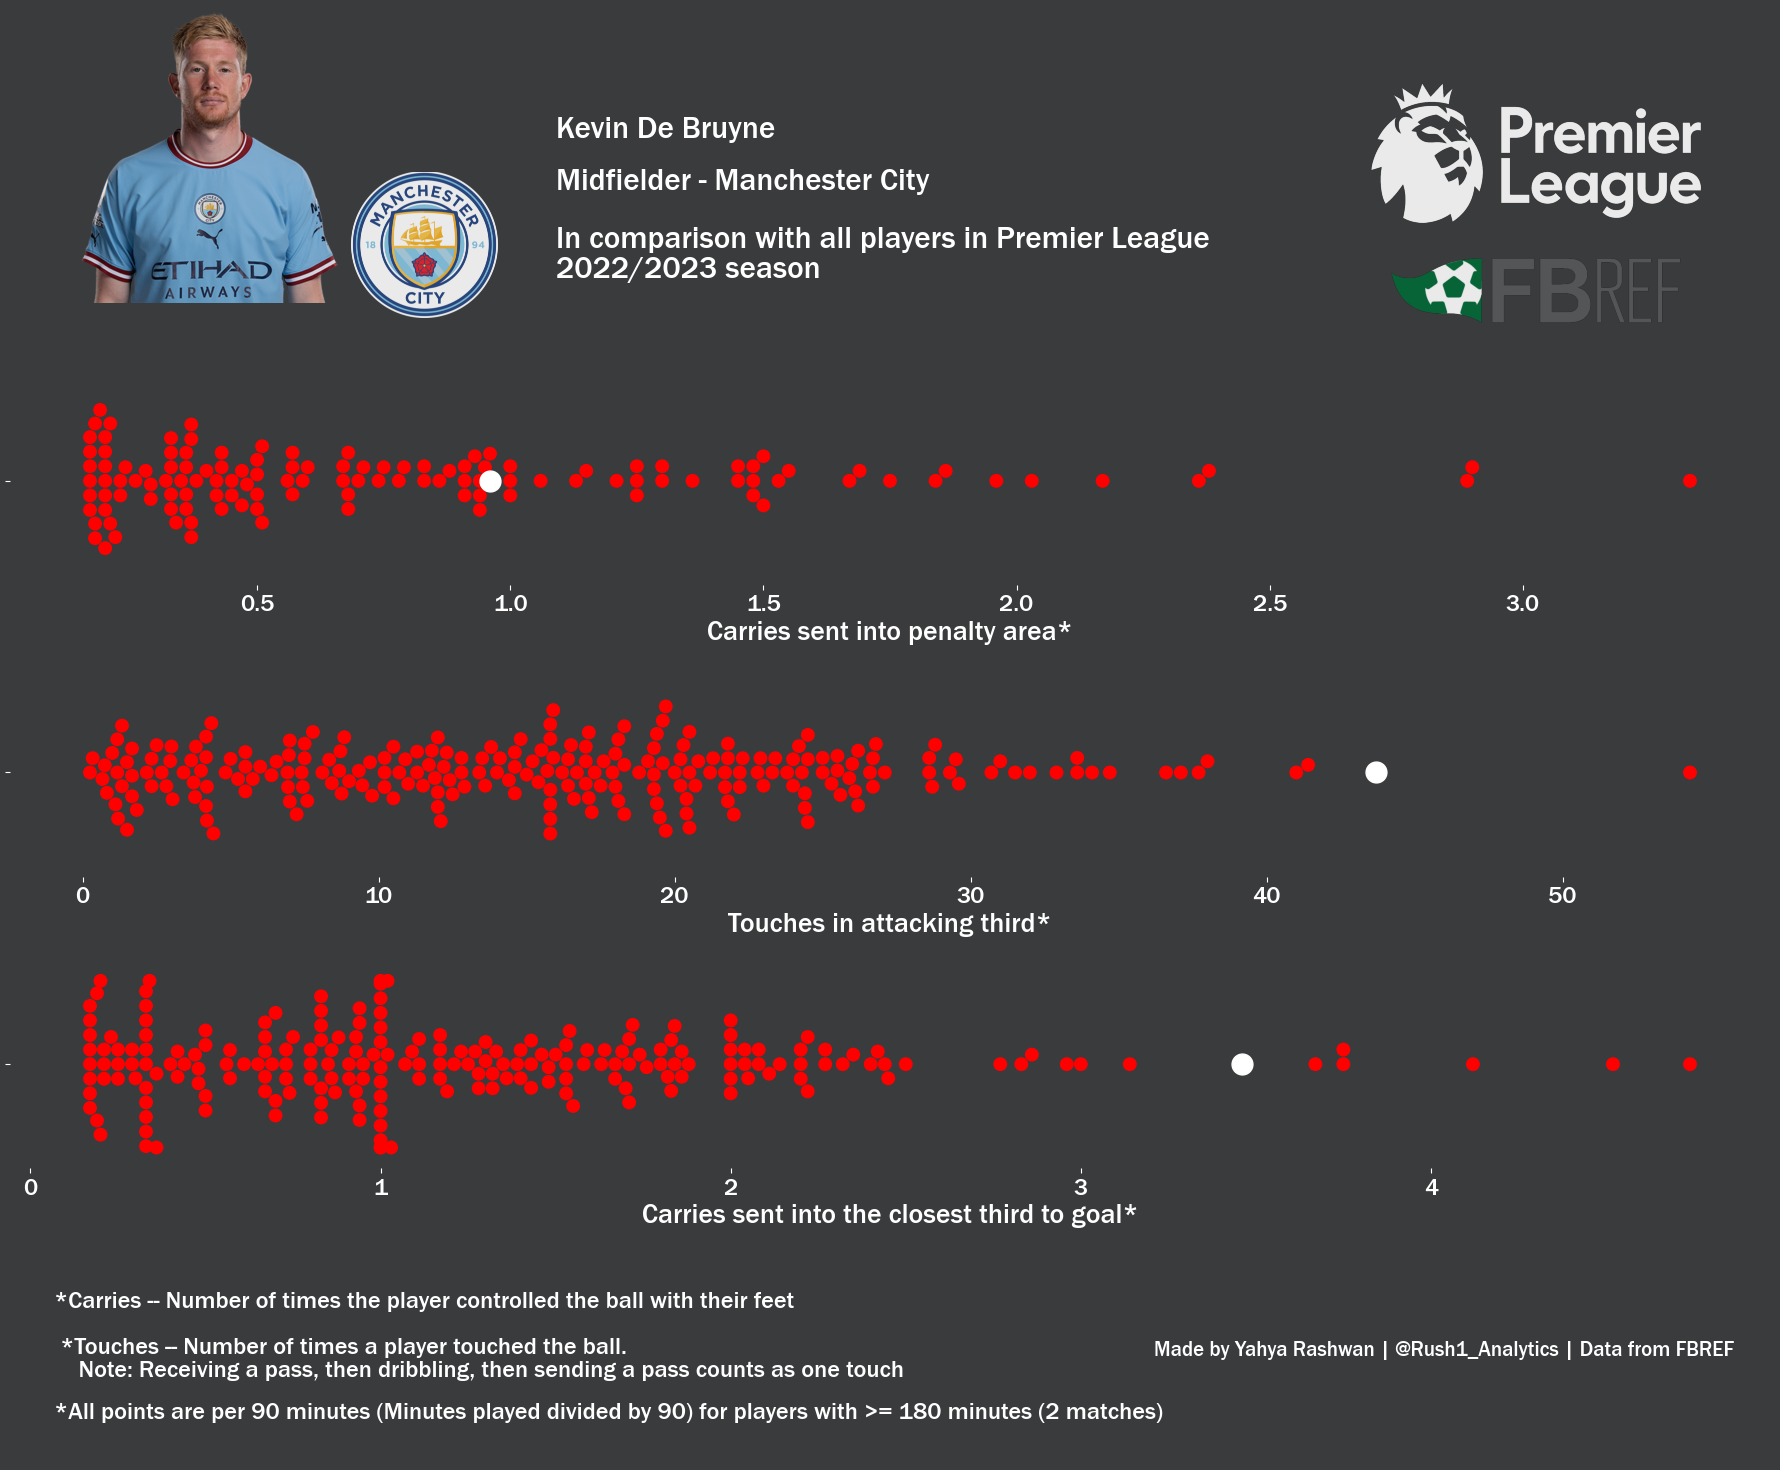

In [313]:
import matplotlib.pyplot as plt

fontname = 'Franklin Gothic Medium'

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(16*1.375,20*1.375))
text_color = 'white'
fig.set_facecolor('#393b3d')
plt.rcParams['xtick.color']=text_color
plt.rcParams['ytick.color']=text_color
plt.rcParams['axes.labelcolor']='white'
plt.rcParams['text.color']=text_color
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 16

plt.subplots_adjust(left=0.1,
                    bottom=0.4, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for ax in axes.flatten():
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname(fontname) for label in labels]

axes[0].axis('off')

df1 = df[df["Carries sent into penalty area"]>0].reset_index()
df2 = df[df["Touches in attacking third"]>0].reset_index()
df3 = df[df["Carries sent into the closest third to goal"]>0].reset_index()

NamePlot = fig.add_axes((0.125,.8075,0.15/1.125,0.15/1.125))
NamePlot.patch.set_facecolor('#393b3d')
NamePlot.axis('off')
NamePlot.set_zorder(1)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\Players\{PlayerName}.png")
NamePlot.imshow(im,alpha=0.9)

ClubPlot = fig.add_axes((0.255,.8085,0.15/2.25,0.15/2.25))
ClubPlot.patch.set_facecolor('#393b3d')
ClubPlot.axis('off')
ClubPlot.set_zorder(1)

LeaguePlot = fig.add_axes((1-0.125*2.25,.8,0.15,0.15))
LeaguePlot.patch.set_facecolor('#393b3d')
LeaguePlot.axis('off')
LeaguePlot.set_zorder(1)
im = plt.imread(rf"C:\Users\YahyaRashwan\Downloads\kindpng_121809.png")
LeaguePlot.imshow(im,alpha=0.9)

FBREFPlot = fig.add_axes((1-0.125*2.25,.75,0.15,0.15))
FBREFPlot.patch.set_facecolor('#393b3d')
FBREFPlot.axis('off')
FBREFPlot.set_zorder(1)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\idXc7lyQtc.png")
FBREFPlot.imshow(im,alpha=0.9)

FirstPlot = sns.swarmplot(x="Carries sent into penalty area",data=df1,color='red',s=10,zorder=1,ax=axes[1])
SecondPlot = sns.swarmplot(x="Touches in attacking third",data=df2,color='red',s=10,zorder=1,ax=axes[2])
LastPlot = sns.swarmplot(x="Carries sent into the closest third to goal",data=df3,color='red',s=10,zorder=1,ax=axes[3])

FirstPlot.set_xlabel(xlabel="Carries sent into penalty area*",fontsize=20,font=fontname)
SecondPlot.set_xlabel(xlabel="Touches in attacking third*",fontsize=20,font=fontname)
LastPlot.set_xlabel(xlabel="Carries sent into the closest third to goal*",fontsize=20,font=fontname)

for i in list(axes):
    i.spines.right.set_visible(False)
    i.spines.top.set_visible(False)
    i.spines.left.set_visible(False)
    i.spines.bottom.set_visible(False)

    i.tick_params(axis='both', which='major', labelsize=17.5,color='white')
    i.set_facecolor('#393b3d')
    for spine in i.spines.values():
            spine.set_edgecolor('white')

for i in range(1,len(df)):
    if df['Player'][i]==PlayerName:
        FirstPlot.scatter(x=df["Carries sent into penalty area"][i],y=0,s=150*1.5,c='white')
        SecondPlot.scatter(x=df["Touches in attacking third"][i],y=0,s=150*1.5,c='white')
        LastPlot.scatter(x=df['Carries sent into the closest third to goal'][i],y=0,s=150*1.5,c='white')
        axes[0].text(s=df['Player'][i],x=.31,y=0.75,fontsize=22.5,font=fontname)
        axes[0].text(s=f"{df['Pos'][i]} - {df['Squad'][i]}",x=.31,y=0.5,fontsize=22.5,font=fontname)
        axes[0].text(s="In comparison with all players in Premier League\n2022/2023 season",x=.31,y=0.075,fontsize=22.5,font=fontname)
        im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{df.Squad[i]}.png")
        ClubPlot.imshow(im,alpha=0.9)

axes[4].axis("off")
axes[4].text(s="Made by Yahya Rashwan | @Rush1_Analytics | Data from FBREF",x=0.65,y=0.5,fontsize=15,font=fontname)
axes[4].text(s=f"*All points are per 90 minutes (Minutes played divided by 90) for players with >= 180 minutes (2 matches)",x=0.025,y=0.2,fontsize=17.5,font=fontname)
axes[4].text(s=f"*Carries -- Number of times the player controlled the ball with their feet\n\n *Touches -- Number of times a player touched the ball. \n    Note: Receiving a pass, then dribbling, then sending a pass counts as one touch",x=0.025,y=0.4,fontsize=17.5,font=fontname)
fig.savefig(rf"C:\Users\YahyaRashwan\Desktop\Points Plot\{PlayerName} scatter plot.png", bbox_inches='tight')
